In [1]:
# 1. Basic
# Load tensorflow
import tensorflow as tf

hello = tf.constant('Hello, Tensorflow!')
a = tf.constant(2)
b = tf.constant(21)
c = tf.add(a,b)

print(hello)
print(c)
sess = tf.Session()
print(sess.run(hello))
print(sess.run(c))

sess.close()

Tensor("Const:0", shape=(), dtype=string)
Tensor("Add:0", shape=(), dtype=int32)
b'Hello, Tensorflow!'
23


In [2]:
X = tf.placeholder(tf.float32, [None, 3])
print(X)

# Define Graph
x_data = [[1,2,3],[4,5,6]]                # Shape : [2,3]
W = tf.Variable(tf.random_normal([3,2]))  # Shape : [3,2]
b = tf.Variable(tf.random_normal([2,1]))  # Shape : [2,1]
XW = tf.matmul(X,W)                       # Shape : [2,2]
y = XW + b                                # Shape : [2,2]

sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

print("x_data : {}".format(x_data))
print("W : {}".format(sess.run(W)))
print("b : {}".format(sess.run(b)))
print("tf.matmul(X,W) : {}".format(sess.run(XW, feed_dict={X: x_data})))
print("y : {}".format(sess.run(y, feed_dict={X: x_data})))

sess.close()

Tensor("Placeholder:0", shape=(?, 3), dtype=float32)
Instructions for updating:
Colocations handled automatically by placer.
x_data : [[1, 2, 3], [4, 5, 6]]
W : [[ 0.6313646  -0.591647  ]
 [-0.10958161  1.0041803 ]
 [-0.09503607  0.53756493]]
b : [[0.6392081]
 [1.1563544]]
tf.matmul(X,W) : [[0.12709312 3.0294085 ]
 [1.4073339  5.879703  ]]
y : [[0.7663012 3.6686165]
 [2.5636883 7.0360575]]


In [3]:
# MNIST(손글씨 숫자 인식)

from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("./mnist/data/", one_hot=True)
print (mnist.train.images.shape)
print (mnist.validation.images.shape)
print (mnist.test.images.shape)


Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/datas

In [0]:
try:
    tf.reset_default_graph()
    sess.close()
    
except:
    pass


In [5]:
# 2. Single-Layer Perceptron
#########
# Define Graph
#########
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

W = tf.Variable(tf.random_normal([784, 10], stddev=0.01))
model = tf.matmul(X, W)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=model, labels=Y))
optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)

#########
# Training
#########
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

batch_size = 100
total_batch = int(mnist.train.num_examples / batch_size)

for epoch in range(15):
    total_cost = 0

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)

        _, cost_val = sess.run([optimizer, cost], feed_dict={X: batch_xs, Y: batch_ys})
        total_cost += cost_val

    print('Epoch:', '%04d' % (epoch + 1),
          'Avg. cost =', '{:.3f}'.format(total_cost / total_batch))

is_correct = tf.equal(tf.argmax(model, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
print('Accuracy:', sess.run(accuracy,
                        feed_dict={X: mnist.test.images,
                                   Y: mnist.test.labels}))

Epoch: 0001 Avg. cost = 0.643
Epoch: 0002 Avg. cost = 0.357
Epoch: 0003 Avg. cost = 0.318
Epoch: 0004 Avg. cost = 0.300
Epoch: 0005 Avg. cost = 0.290
Epoch: 0006 Avg. cost = 0.282
Epoch: 0007 Avg. cost = 0.277
Epoch: 0008 Avg. cost = 0.273
Epoch: 0009 Avg. cost = 0.270
Epoch: 0010 Avg. cost = 0.267
Epoch: 0011 Avg. cost = 0.265
Epoch: 0012 Avg. cost = 0.263
Epoch: 0013 Avg. cost = 0.261
Epoch: 0014 Avg. cost = 0.259
Epoch: 0015 Avg. cost = 0.258
Accuracy: 0.9254


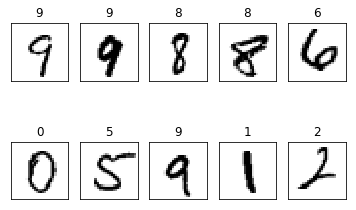

In [6]:
import matplotlib.pyplot as plt
import numpy as np

labels = sess.run(model,
                  feed_dict={X: mnist.test.images,
                             Y: mnist.test.labels})
1
shuff_idx = np.random.randint(mnist.test.images.shape[0], size=10)
fig = plt.figure()
for i in range(10):
    idx = shuff_idx[i]
    subplot = fig.add_subplot(2, 5, i + 1)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.set_title('%d' % np.argmax(labels[idx])) # prediction
    subplot.imshow(mnist.test.images[idx].reshape((28, 28)),
                   cmap=plt.cm.gray_r)

plt.show()

In [7]:
# 3-1. Multi-Layer Perceptron (2 Layers)
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

W1 = tf.Variable(tf.random_normal([784, 128], stddev=0.01))
L1 = tf.nn.relu(tf.matmul(X, W1))

W2 = tf.Variable(tf.random_normal([128, 10], stddev=0.01))
model = tf.matmul(L1, W2)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=model, labels=Y))
optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

batch_size = 100
total_batch = int(mnist.train.num_examples / batch_size)

for epoch in range(15):
    total_cost = 0

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)

        _, cost_val = sess.run([optimizer, cost], feed_dict={X: batch_xs, Y: batch_ys})
        total_cost += cost_val

    print('Epoch:', '%04d' % (epoch + 1),
          'Avg. cost =', '{:.3f}'.format(total_cost / total_batch))

is_correct = tf.equal(tf.argmax(model, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
print('Accuracy:', sess.run(accuracy,
                        feed_dict={X: mnist.test.images,
                                   Y: mnist.test.labels}))

Epoch: 0001 Avg. cost = 0.464
Epoch: 0002 Avg. cost = 0.216
Epoch: 0003 Avg. cost = 0.155
Epoch: 0004 Avg. cost = 0.120
Epoch: 0005 Avg. cost = 0.096
Epoch: 0006 Avg. cost = 0.079
Epoch: 0007 Avg. cost = 0.065
Epoch: 0008 Avg. cost = 0.055
Epoch: 0009 Avg. cost = 0.047
Epoch: 0010 Avg. cost = 0.040
Epoch: 0011 Avg. cost = 0.034
Epoch: 0012 Avg. cost = 0.028
Epoch: 0013 Avg. cost = 0.024
Epoch: 0014 Avg. cost = 0.021
Epoch: 0015 Avg. cost = 0.018
Accuracy: 0.975


In [8]:
# 3-2. Multi-Layer Perceptron (3 Layers)
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

W1 = tf.Variable(tf.random_normal([784, 128], stddev=0.01))
L1 = tf.nn.sigmoid(tf.matmul(X, W1))

###################### Mission 1 ############################
# TODO:                                                     #
# Design a 3-layer perceptron network.                      #
# You could use different non-linear activation function.   #
#############################################################

model = tf.matmul(L_new, W3)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=model, labels=Y))
optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

batch_size = 100
total_batch = int(mnist.train.num_examples / batch_size)

for epoch in range(15):
    total_cost = 0

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)

        _, cost_val = sess.run([optimizer, cost], feed_dict={X: batch_xs, Y: batch_ys})
        total_cost += cost_val

    print('Epoch:', '%04d' % (epoch + 1),
          'Avg. cost =', '{:.3f}'.format(total_cost / total_batch))

is_correct = tf.equal(tf.argmax(model, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
print('Accuracy:', sess.run(accuracy,
                        feed_dict={X: mnist.test.images,
                                   Y: mnist.test.labels}))

Epoch: 0001 Avg. cost = 1.874
Epoch: 0002 Avg. cost = 0.664
Epoch: 0003 Avg. cost = 0.410
Epoch: 0004 Avg. cost = 0.317
Epoch: 0005 Avg. cost = 0.258
Epoch: 0006 Avg. cost = 0.214
Epoch: 0007 Avg. cost = 0.183
Epoch: 0008 Avg. cost = 0.161
Epoch: 0009 Avg. cost = 0.138
Epoch: 0010 Avg. cost = 0.126
Epoch: 0011 Avg. cost = 0.111
Epoch: 0012 Avg. cost = 0.100
Epoch: 0013 Avg. cost = 0.092
Epoch: 0014 Avg. cost = 0.084
Epoch: 0015 Avg. cost = 0.075
Accuracy: 0.9641
